**Name:** <span style="color:red">Write your name here</span>

# SYSTEMS AND NETWORK BIOLOGY - PRACTICAL 6
# Stochastic description of protein expression

---

To submit your report, answer the questions below and save the *notebook* clicking on `File > Download as > iPython Notebook` in the menu at the top of the page. **Rename the notebook file** to ''`practicalN_name1_name2.ipynb`'', where `N` is the number of the practical, and `name1` and `name2` are the first surnames of the two team members (only one name if the report is sent individually). Finally, **submit the resulting file through the *Aul@-ESCI***.

Remember to label the axes in all the plots.

*IMPORTANT REMINDER: Before the final submission, remember to **reset the kernel** and re-run the whole notebook again to check that it works.*

---

Here we implement a stochastic description of simple protein expression processes, using a stochastic simulation algorithm know as the *next-reaction method*. We will consider a biochemical process constituted by $M$ reactions, denoted by $\mu=1,2,\ldots, M$, and $N$ biomolecular species, denoted by $i=1,2,\ldots,N$.

Let the rate of reaction $\mu$ be $k_\mu$, and their corresponding reactants $x_i^{(\mu)}$. The probability that this reaction occurs in the interval $(t,t+dt)$ given the state of the system at time $t$ is given by $a_\mu dt$, where $a_\mu$ is the *propensity* of the reaction. Following the law of mass action, and assuming that only one molecule of each reactant species is involved, the propensity of reaction $\mu$ has the form:

$$
a_\mu=k_\mu \prod_{i=1}^N x_i^{(\mu)}
$$

Another important piece of information that characterizes the reactions is the *stoichiometry matrix* $S_{\mu,i}$. The columns of this matrix are the reactions and the rows are the biomolecular species. The elements of the matrix represent how each reaction affect each species (e.g. a species that loses one molecule in a reaction has a value -1 in the corresponding matrix location, while if the reaction produces two molecules of a species, the corresponding matrix element is 2). Once the propensities and the stoichimetry matrix are known, the steps of the next-reaction stochastic simulation algorithm are:

1. Initialize the system (number of molecules and time)

2. Calculate the propensities of all reactions

3. Calculate the time $\tau$ at which the next reaction happens, using the expression:
$$
\tau=\frac{1}{a_{tot}}\ln\frac{1}{z_1}
$$
where $a_{tot}=\sum_{\nu=1}^Ma_\nu$ and $z_1$ is a random number uniformly distributed between 0 and 1.

4. Determine the reaction that occurs at time $\tau$ by calculating the smallest integer $\lambda$ such that
$$
\sum_{\nu=1}^\lambda a_\nu > z_2 \sum_{\nu=1}^Ma_\nu
$$
where $z_2$ is another random number uniformly distributed between 0 and 1.

5. Update the molecule numbers according to the stoichimetry coefficients $S_{\mu,i}$.

6. Go to step 2 to compute the next reaction.

Let us implement this algorithm for a simple birth-death process representing protein expression and degradation:
$$
\emptyset\overset{k_{exp}}{\rightarrow} A,\quad A\overset{k_{deg}}{\rightarrow}\emptyset
$$

First, we load all necessary `Python` packages.

In [28]:
import numpy as np
import matplotlib.pyplot as plt

Next, we define the values of the parameters, the stoichimetry matrix and the initial conditions (step 1 above). We consider first that $k_{exp}=100$ and $k_{deg}=1$.

In [29]:
# Reaction rates
k_exp = 100  # Expression rate
k_deg = 1    # Degradation rate

# Initial molecule count
molecule_count = 0
time = 0.0

# Set simulation time and sampling interval
simulation_time = 200
mt = 0.1


Now we compute the propensities (step 2 above), calculate the next reaction time (step 3), and determine the reaction that takes place (step 4). For steps 3 and 4 use the function `uniform` from the module `numpy.random`.

In [30]:
# Calculate propensities
a_exp = k_exp  # Propensity for expression reaction
a_deg = k_deg * molecule_count  # Propensity for degradation reaction
propensities = np.array([a_exp, a_deg])
a_total = propensities.sum()

# Calculate the time for the next reaction
if a_total > 0:
    tau = (1 / a_total) * np.log(1 / np.random.uniform(0, 1))
    time += tau  # Update the time with the calculated increment
else:
    tau = float('inf')  # No reactions can occur if a_total is zero

# Generate a random number to choose the reaction
r2 = np.random.uniform(0, 1) * a_total
cumulative_sum = 0

# Find the reaction that will occur
for i, a in enumerate(propensities):
    cumulative_sum += a
    if cumulative_sum > r2:
        reaction_index = i
        break


Finally, we update the molecule numbers and the time variable (step 5 above).

In [31]:
# Update the molecule count based on the reaction that occurred
if reaction_index == 0:  # Expression reaction
    molecule_count += 1
elif reaction_index == 1:  # Degradation reaction
    molecule_count -= 1


Now put together steps 2-5 above in a loop, and generate output every *mt* time units (you might need to save the same state of the system for multiple output times, if no reaction happens in a given *mt* interval). Run the simulation for 200 time units with sampling period $mt=0.1$.

In [32]:
# Lists to store time and molecule counts for plotting
times = [time]
molecule_counts = [molecule_count]

# Simulation loop
while time < simulation_time:
    # Step 2: Calculate propensities
    a_exp = k_exp  # Expression (birth) reaction propensity
    a_deg = k_deg * molecule_count  # Degradation (death) reaction propensity
    propensities = np.array([a_exp, a_deg])
    a_total = propensities.sum()
    
    # Check if no reactions can happen
    if a_total == 0:
        break
    
    # Step 3: Calculate the time for the next reaction
    tau = (1 / a_total) * np.log(1 / np.random.uniform(0, 1))
    time += tau
    
    # Step 4: Determine which reaction occurs
    r2 = np.random.uniform(0, 1) * a_total
    cumulative_sum = 0
    for i, a in enumerate(propensities):
        cumulative_sum += a
        if cumulative_sum > r2:
            reaction_index = i
            break
    
    # Update molecule counts based on the reaction
    if reaction_index == 0:  # Expression reaction
        molecule_count += 1
    elif reaction_index == 1:  # Degradation reaction
        molecule_count -= 1
    
    # Record the state
    times.append(time)
    molecule_counts.append(molecule_count)


Now we plot the time series of molecule numbers, and the histogram of molecule number of all data during the second half of the simulation (stationary state). Normalize this histogram so that it has unit area, and compare it with the expression of the Poisson distribution derived in class.

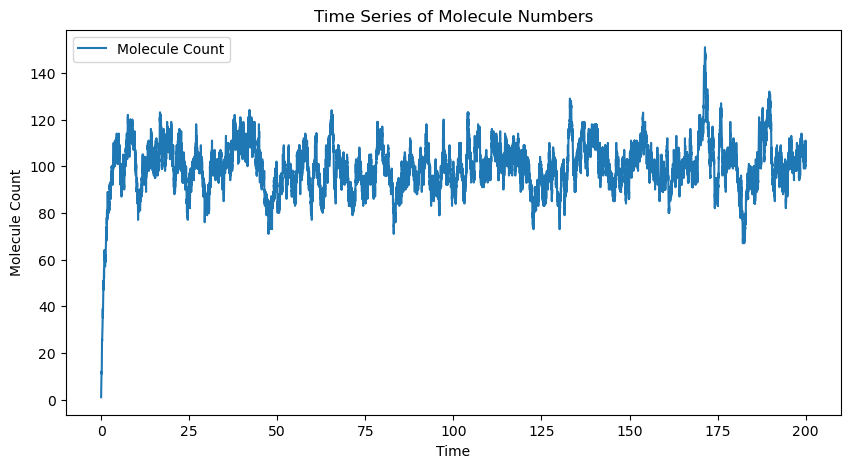

/var/folders/58/mqnkbb092jq3gj50ypfg16gh0000gn/T/ipykernel_19663/2188745639.py:26: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  poisson_probs = [np.exp(-mean_count) * mean_count**k / np.math.factorial(k) for k in poisson_values]
/var/folders/58/mqnkbb092jq3gj50ypfg16gh0000gn/T/ipykernel_19663/2188745639.py:26: RuntimeWarning: overflow encountered in scalar power
  poisson_probs = [np.exp(-mean_count) * mean_count**k / np.math.factorial(k) for k in poisson_values]


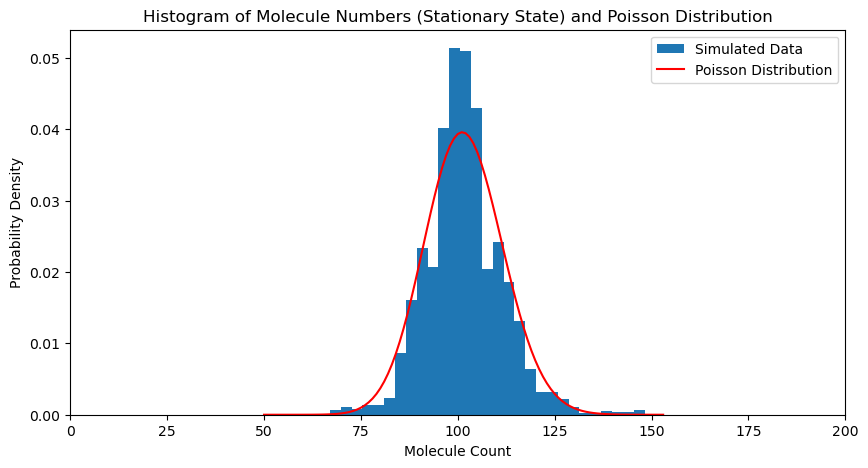

In [33]:
import matplotlib.pyplot as plt

# Assuming `times` and `molecule_counts` are lists containing the time points and molecule counts
# collected during the simulation.

plt.figure(figsize=(10, 5))
plt.plot(times, molecule_counts, label="Molecule Count")
plt.xlabel("Time")
plt.ylabel("Molecule Count")
plt.title("Time Series of Molecule Numbers")
plt.legend()
plt.show()

# Extract the stationary phase data (second half of the molecule counts)
stationary_counts = molecule_counts[len(molecule_counts)//2:]

# Calculate mean molecule count in the stationary state for Poisson distribution
mean_count = np.mean(stationary_counts)

# Generate the histogram with normalized area
plt.figure(figsize=(10, 5))
plt.hist(stationary_counts, bins=30, density=True, label="Simulated Data")

# Overlay the Poisson distribution with the calculated mean
poisson_values = range(50, 160)
poisson_probs = [np.exp(-mean_count) * mean_count**k / np.math.factorial(k) for k in poisson_values]
plt.plot(poisson_values, poisson_probs, '-', color='red', label="Poisson Distribution")

plt.xlim(0,200)
plt.xlabel("Molecule Count")
plt.ylabel("Probability Density")
plt.title("Histogram of Molecule Numbers (Stationary State) and Poisson Distribution")
plt.legend()
plt.show()


---
The top plot starts from zero molecules and gradually reaches a stable range, this stable range is the steady-state behavior. The initial rise indicates the production and accumulation of molecules. Subsequently, fluctuations around a mean value suggest a balance between synthesis and degradation reactions. The variability in molecule count is a direct consequence of the stochastic nature of biochemical reactions, which encompass both synthesis and degradation. This inherent randomness leads to fluctuations, a characteristic feature of stochastic systems in biology.

The bottom plot presents a histogram of molecule counts during the stationary state (steady-state region). The histogram is normalized to have a total area of one, enabling comparison to a theoretical Poisson distribution. The red line represents a Poisson distribution i did for molecule counts in this system. The similarity between the histogram and the Poisson curve suggests that the molecule counts indeed follow a Poisson distribution.
---

Next, we separate the expression into transcription and translation. We thus have four reactions (transcription, translation, mRNA degradation and protein degradation) and two species (mRNA and protein). Integrate the system of reactions and plot the resulting time series and normalized histograms for the two species. Consider a transcription rate $k_{tx}=10$, a translation rate $k_{tl}=100$, and $k_{deg}=1$.

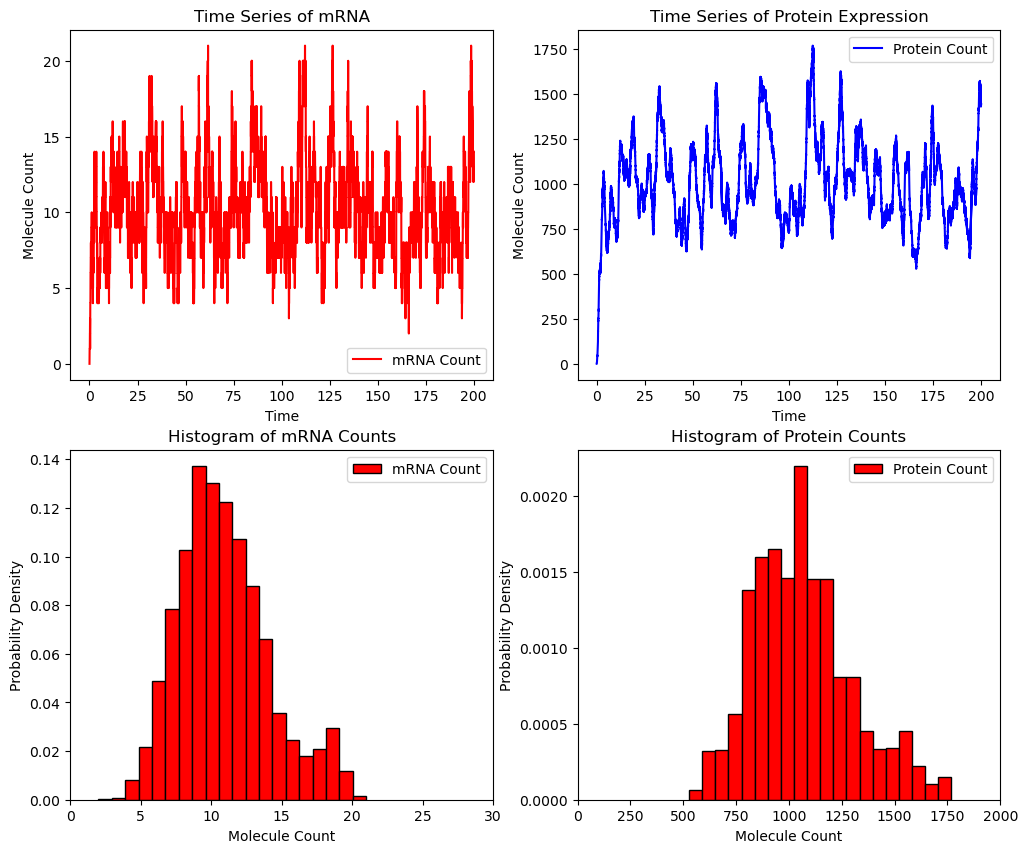

In [50]:
import numpy as np
import matplotlib.pyplot as plt

k_tx = 10     #transcription 
k_tl = 100    #translation 
k_rna_deg = 1  #rna degradation 
k_protein_deg = 1  #protein degradation 
rna_count = 0
prot_count = 0
time = 0.0
simulation_time = 200
times = [time]
rna_counts = [rna_count]
prot_counts = [prot_count]

def calculate_propensities(rna_count, protein_count):
    a_tx = k_tx                           #transcription
    a_tl = k_tl * rna_count              #translation
    a_rna_deg = k_rna_deg * rna_count  #rna degradation
    a_protein_deg = k_protein_deg * protein_count  #protein degradation
    return np.array([a_tx, a_tl, a_rna_deg, a_protein_deg])

while time < simulation_time:
    propensities = calculate_propensities(rna_count, prot_count)
    a_total = propensities.sum()
    
    tau = (1 / a_total) * np.log(1 / np.random.uniform(0, 1))
    time += tau
    
    r2 = np.random.uniform(0, 1) * a_total
    cumulative_sum = 0
    for i, a in enumerate(propensities):
        cumulative_sum += a
        if cumulative_sum > r2:
            reaction_index = i
            break
    
    if reaction_index == 0:      #transcription
        rna_count += 1
    elif reaction_index == 1:    #tranlation
        prot_count += 1
    elif reaction_index == 2:    #rna degradation
        rna_count -= 1
    elif reaction_index == 3:    #protein degradation
        prot_count -= 1
    
    times.append(time)
    rna_counts.append(rna_count)
    prot_counts.append(prot_count)

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[0,0].plot(times, rna_counts, label="mRNA Count", color='red')
axs[0,0].set_xlabel("Time")
axs[0,0].set_ylabel("Molecule Count")
axs[0,0].set_title("Time Series of mRNA")
axs[0,0].legend()

axs[0,1].plot(times, prot_counts, label="Protein Count", color='blue')
axs[0,1].set_xlabel("Time")
axs[0,1].set_ylabel("Molecule Count")
axs[0,1].set_title("Time Series of Protein Expression")
axs[0,1].legend()

#get second half
stationary_rna_counts = rna_counts[len(rna_counts)//2:]
stationary_prot_counts = prot_counts[len(prot_counts)//2:]


axs[1,0].hist(stationary_rna_counts, bins=20, density = True, color='red', edgecolor= "black", label="mRNA Count")
axs[1,0].set_xlabel("Molecule Count")
axs[1,0].set_ylabel("Probability Density")
axs[1,0].set_title("Histogram of mRNA Counts")
axs[1,0].set_xlim(0,30)
axs[1,0].legend()


axs[1,1].hist(stationary_prot_counts, bins=20, density= True , color= "red", edgecolor= "black", label="Protein Count")
axs[1,1].set_xlabel("Molecule Count")
axs[1,1].set_ylabel("Probability Density")
axs[1,1].set_title("Histogram of Protein Counts")
axs[1,1].set_xlim(0,2000)
axs[1,1].legend()
plt.show()


---

Time Series of mRNA (Top Left):
This plot depicts the fluctuating mRNA molecule count over time. The peaks and valleys reflect the stochastic nature of mRNA transcription and degradation. The fluctuations appear around a relatively stable average level, suggesting a dynamic equilibrium where transcription and degradation rates balance out over time.

Time Series of Protein Expression (Top Right):
This plot tracks the protein molecule counts over time, showcasing the stochastic creation of proteins (translation from mRNA) and their degradation. Compared to mRNA, protein levels exhibit larger fluctuations and higher values. This is expected since each mRNA molecule can translate into multiple protein molecules before being degraded. The fluctuations suggest that the system also reaches a relatively stable dynamic equilibrium for protein counts.

Histogram of mRNA Counts (Bottom Left):
This histogram presents the distribution of mRNA molecule counts over time, normalized as a probability density. The histogram is centered around a specific count value, indicating that most observations fall near this value, with a spread representing random fluctuations. The shape of the histogram reflects the balance between transcription and degradation rates. The distribution’s peak signifies the most probable mRNA count at equilibrium.

Histogram of Protein Counts (Bottom Right):
This histogram illustrates the distribution of protein counts over time, also as a probability density. Protein counts are generally higher and more widely spread compared to mRNA counts. This is because each mRNA molecule can produce multiple proteins.
The broader distribution and higher range of counts indicate greater variability in protein expression levels. The shape of the distribution is influenced by both translation and protein degradation rates.

---

Finally, scale the transcription and translation rates by the same factor, multiplying one of the rates and dividing the other, in such a way that the product remains constant, and discuss what happens with the mean and standard deviation of the distribution of protein numbers for different values of this factor (smaller and larger than 1).

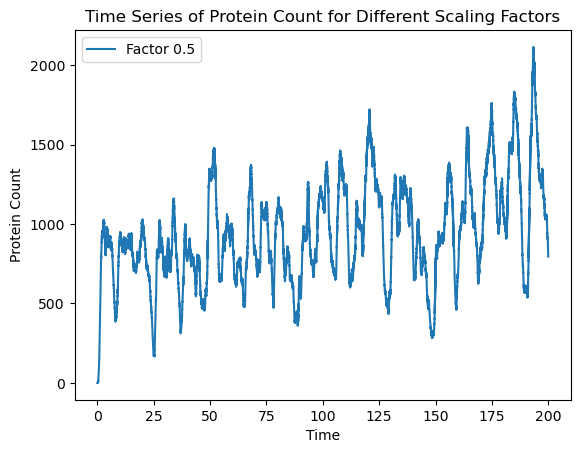

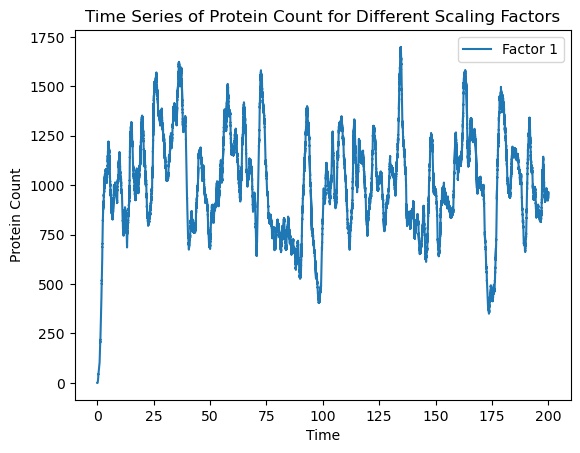

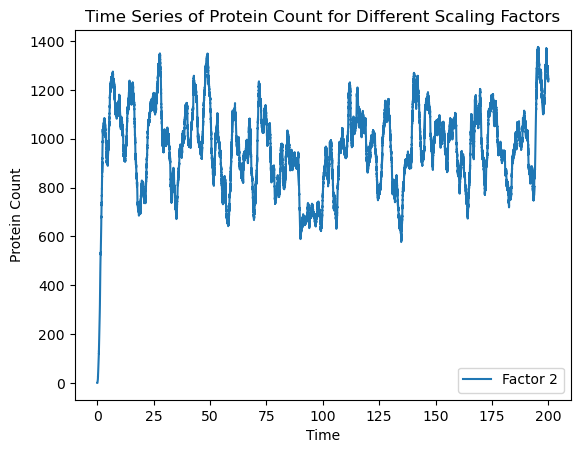

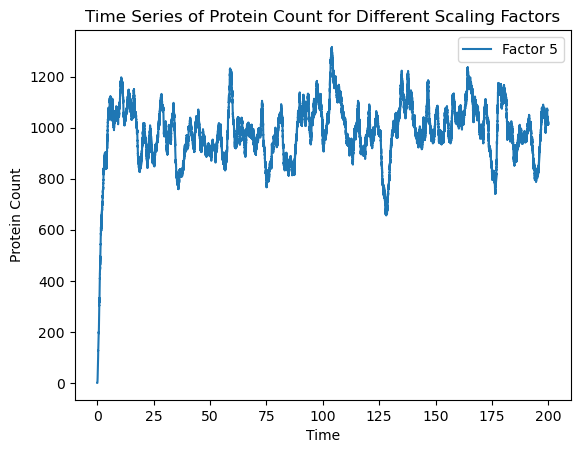

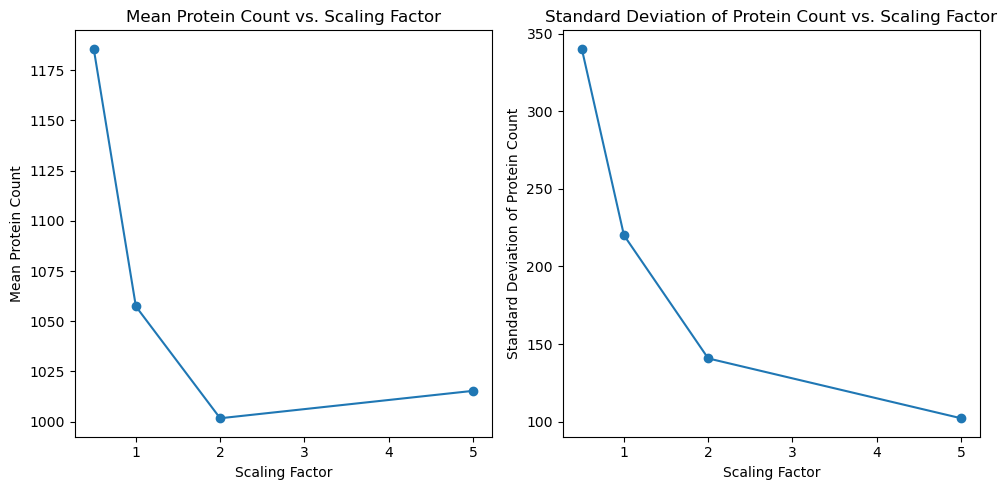

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# Initial constants
k_tx = 10        # original transcription rate
k_tl = 100       # original translation rate
k_rna_deg = 1    # RNA degradation rate
k_protein_deg = 1  # protein degradation rate
simulation_time = 200

# Function to calculate propensities
def calculate_propensities(rna_count, protein_count, k_tx, k_tl):
    a_tx = k_tx                            # transcription
    a_tl = k_tl * rna_count                # translation
    a_rna_deg = k_rna_deg * rna_count      # RNA degradation
    a_protein_deg = k_protein_deg * protein_count  # protein degradation
    return np.array([a_tx, a_tl, a_rna_deg, a_protein_deg])

# Function to run simulation with scaling factor f
def run_simulation(f):
    # Scale transcription and translation rates
    k_tx_scaled = k_tx * f
    k_tl_scaled = k_tl / f
    
    # Initialize variables
    rna_count = 0
    prot_count = 0
    time = 0.0
    times = [time]
    rna_counts = [rna_count]
    prot_counts = [prot_count]

    # Stochastic simulation loop
    while time < simulation_time:
        propensities = calculate_propensities(rna_count, prot_count, k_tx_scaled, k_tl_scaled)
        a_total = propensities.sum()
        
        # Time until next reaction
        tau = (1 / a_total) * np.log(1 / np.random.uniform(0, 1))
        time += tau
        
        # Choose which reaction occurs
        r2 = np.random.uniform(0, 1) * a_total
        cumulative_sum = 0
        for i, a in enumerate(propensities):
            cumulative_sum += a
            if cumulative_sum > r2:
                reaction_index = i
                break
        
        # Update molecule counts based on the reaction chosen
        if reaction_index == 0:      # transcription
            rna_count += 1
        elif reaction_index == 1:    # translation
            prot_count += 1
        elif reaction_index == 2:    # RNA degradation
            rna_count -= 1
        elif reaction_index == 3:    # protein degradation
            prot_count -= 1
        
        times.append(time)
        rna_counts.append(rna_count)
        prot_counts.append(prot_count)
    
    # Extract stationary distribution for protein
    stationary_prot_counts = prot_counts[len(prot_counts)//2:]
    mean_protein = np.mean(stationary_prot_counts)
    std_protein = np.std(stationary_prot_counts)
    
    return times, rna_counts, prot_counts, mean_protein, std_protein

# Define scaling factors to test
factors = [0.5, 1, 2, 5]
results = []

# Run simulations for each factor
for f in factors:
    times, rna_counts, prot_counts, mean_protein, std_protein = run_simulation(f)
    results.append((f, mean_protein, std_protein))
    
    # Plotting time series of protein count for each factor
    plt.plot(times, prot_counts, label=f"Factor {f}")
    plt.xlabel("Time")
    plt.ylabel("Protein Count")
    plt.title("Time Series of Protein Count for Different Scaling Factors")
    plt.legend()
    plt.show()

# Plot mean and standard deviation of protein count as a function of the scaling factor
f_values, means, std_devs = zip(*results)
plt.figure(figsize=(10, 5))

# Mean protein count
plt.subplot(1, 2, 1)
plt.plot(f_values, means, marker='o')
plt.xlabel("Scaling Factor")
plt.ylabel("Mean Protein Count")
plt.title("Mean Protein Count vs. Scaling Factor")

# Standard deviation of protein count
plt.subplot(1, 2, 2)
plt.plot(f_values, std_devs, marker='o')
plt.xlabel("Scaling Factor")
plt.ylabel("Standard Deviation of Protein Count")
plt.title("Standard Deviation of Protein Count vs. Scaling Factor")

plt.tight_layout()
plt.show()


---

we can see that scaling transcription and translation rates by a factor keeps their product more or less constant stabilizes the mean protein count but significantly reduces the standard deviation as f increases. 

This is because a higher f produces more mRNA molecules with each mRNA translating fewer proteins, creating an "averaging effect" that reduces fluctuations in protein levels. 

In contrast, a lower f results in fewer mRNA molecules, each producing more proteins, leading to higher variability in protein count due to greater sensitivity to random events affecting individual mRNAs.

---